In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/market_basket.csv', index_col=0)

In [3]:
df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [4]:
df.tail()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
131702,04/07/2016,20203,32900,IEV,FO112,3.0,6.46
131703,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50
131704,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19
131705,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57
131706,04/07/2016,20203,32900,Q4N,QM9BP,1.0,13.68


In [5]:
df.describe()

,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.000000,131706.000000,131706.000000,131706.000000
mean,12386.450367,32389.604187,1.485311,11.981524
std,6086.447552,18709.901238,3.872667,19.359699
min,1.000000,1.000000,0.010000,0.020000
25%,7349.000000,16134.000000,1.000000,4.230000
50%,13496.000000,32620.000000,1.000000,6.920000
75%,17306.000000,48548.000000,1.000000,12.330000
max,22625.000000,64682.000000,400.000000,707.730000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131706 entries, 1 to 131706
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            131706 non-null  object 
 1   Customer_ID     131706 non-null  int64  
 2   Transaction_ID  131706 non-null  int64  
 3   SKU_Category    131706 non-null  object 
 4   SKU             131706 non-null  object 
 5   Quantity        131706 non-null  float64
 6   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 8.0+ MB


In [7]:
df['Date']= pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131706 entries, 1 to 131706
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            131706 non-null  datetime64[ns]
 1   Customer_ID     131706 non-null  int64         
 2   Transaction_ID  131706 non-null  int64         
 3   SKU_Category    131706 non-null  object        
 4   SKU             131706 non-null  object        
 5   Quantity        131706 non-null  float64       
 6   Sales_Amount    131706 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 8.0+ MB


In [9]:
basket = (df.groupby(['Customer_ID', 'SKU'])['Quantity']
         .sum().unstack().reset_index().fillna(0)
         .set_index('Customer_ID'))

In [10]:
basket

SKU,00GVC,00OK1,0121I,01IEO,01IQT,01L05,01V7M,01XVY,029WA,03C6L,...,ZWNCK,ZWWB5,ZX2UM,ZY9N9,ZYF2U,ZZ2AO,ZZDW7,ZZM1A,ZZNC5,ZZX6K
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
def encode_units(x):
    if x <= 0:
        return False
    if x >= 1:
        return True
    else: 
        return False

basket = basket.applymap(encode_units)

In [18]:
df_itemset = apriori(basket, min_support=0.002, use_colnames=True).sort_values(by='support', ascending=False)

In [19]:
df_itemset

,support,itemsets
463,0.072840,(UNJKW)
213,0.030099,(COWU2)
389,0.027094,(OV1P9)
359,0.025812,(M6J9W)
217,0.024309,(CZUZX)
...,...,...
568,0.002033,"(COWU2, JJLXQ)"
560,0.002033,"(LJ26I, 9Y7M0)"
440,0.002033,(T91Q1)
453,0.002033,(U1GN5)


In [21]:
rules = association_rules(df_itemset, metric="lift", min_threshold=1.1).sort_values(by='support', ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(COWU2),(UNJKW),0.030099,0.072840,0.006630,0.220264,3.023956,0.004437,1.189070
1,(UNJKW),(COWU2),0.072840,0.030099,0.006630,0.091019,3.023956,0.004437,1.067020
2,(M6J9W),(UNJKW),0.025812,0.072840,0.004773,0.184932,2.538881,0.002893,1.137524
3,(UNJKW),(M6J9W),0.072840,0.025812,0.004773,0.065534,2.538881,0.002893,1.042508
4,(OV1P9),(UNJKW),0.027094,0.072840,0.004155,0.153344,2.105226,0.002181,1.095085


##### Comment 
Kết quả có sản phẩm nào có support lớn nhất: UNJKW . Sản phẩm này này đi kèm với sản phẩm: COWU2

Text(0.5, 1.0, 'Top 15 highest')

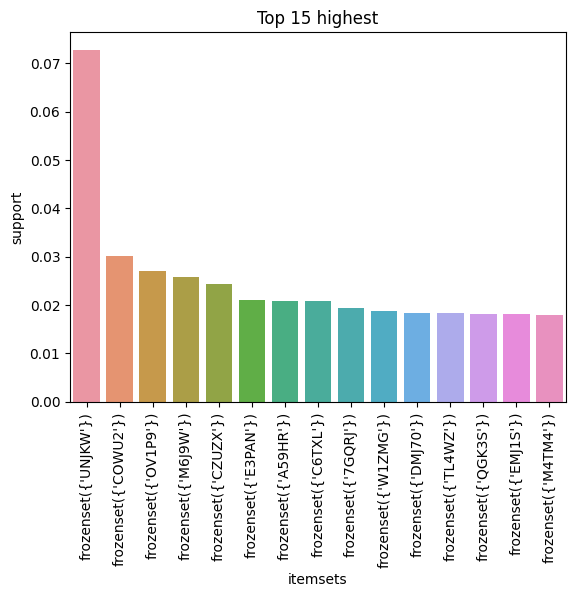

In [25]:
sns.barplot(x='itemsets', 
            y='support',
            data=df_itemset.nlargest(15,'support'))
plt.xticks(rotation=90)
plt.title('Top 15 highest')

Text(0.5, 1.0, 'Top 15 lowest')

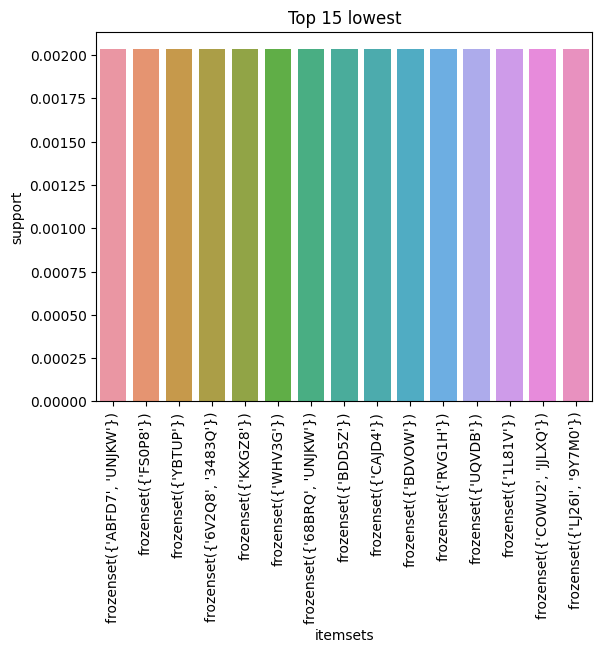

In [24]:
sns.barplot(x='itemsets', 
            y='support',
            data=df_itemset.nsmallest(15,'support'))
plt.xticks(rotation=90)
plt.title('Top 15 lowest')